In [1]:
using Plots
using LaTeXStrings

# MainModule Usage Example

This notebook demonstrates how to use the functions in MainModule.

Ensure that your Julia environment has the necessary files included and the necessary modules installed.

In [2]:
include("src/constants.jl")
include("src/main.jl")
include("src/solver_code.jl")
using .MainModule
using .SolverCode

In [6]:
# ファイルパスを指定
file_path = "data/eos_HQC18_gv100H160.txt"
P = []
e = []
# ファイルを行単位で読み込む
lines = readlines(file_path)
println(lines[1])
for line in lines[2:end]
    # 行をスペースで分割して各値を数値に変換
    values = parse.(Float64, split(line))
    push!(P, values[2]) 
    push!(e, values[4]) 
end

 muB (MeV)    P (MeV/fm^3)           nB/n0    e (MeV/fm^3)              cs


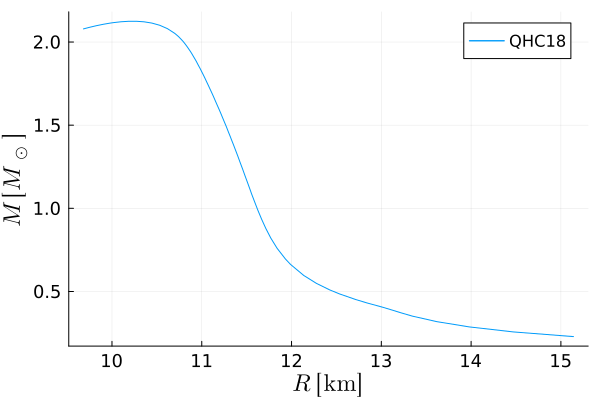

In [7]:
# Use make_eos_monotonic to remove non-monotonic points
mono_e, mono_P = MainModule.make_eos_monotonic(e, P)

# Compute radius, mass, and tidal deformability using out_RMT function
RMT, sol_list = MainModule.out_RMT(mono_e.*MeVfm3_to_gcm3./unit_g, mono_P.*MeVfm3_to_gcm3./unit_g)

plot(RMT[1], RMT[2]; 
    legend=:topright,
    label="QHC18",
    xlabel=L"R\ [\mathrm{km}]", xlabelfontsize=16,
    ylabel=L"M\ [M_\odot]", ylabelfontsize=16,
    # xlims=(8,16),
    xtickfontsize=12,
    ytickfontsize=12,
)
# 凡例のフォントサイズを変更
plot!(legendfontsize=11)  # 凡例のフォントサイズを指定

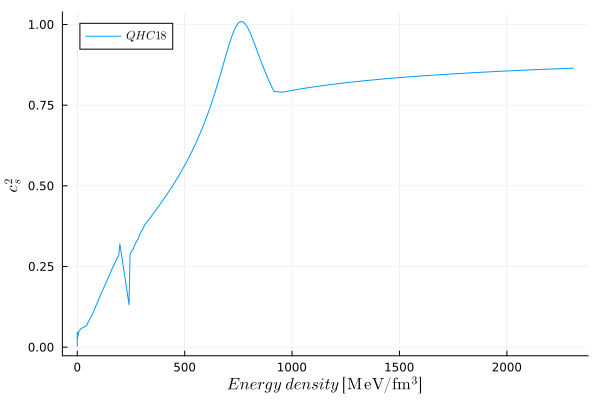

In [8]:
# Calculate the speed of sound from the energy density and pressure
energy_density_trunc, cs_values = MainModule.cs(mono_e, mono_P)

plot(mono_e[2:end], cs_values; 
    label=L"QHC18",
    xlabel=L"Energy\ density\ [\mathrm{MeV/fm^3}]",
    ylabel=L"c^2_s"
)